In [187]:
import pandas as pd
# Import scaffoldgraph
import scaffoldgraph as sg

# Import networkx
import networkx as nx

# Import plotting tools
import matplotlib.pyplot as plt

# Import rdkit
from rdkit.Chem import Draw
from rdkit import Chem

In [ ]:
# function to get hierarchy 
def rearrange(data_dict, smiles):
    new_dict = {'smiles': smiles}
    new_dict.update(data_dict)
    return new_dict


In [189]:
df = pd.read_csv('deepchem-bace.csv')

In [190]:
df

,mol,CID,pIC50
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,9.154901
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,8.853872
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,8.698970
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,8.698970
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,8.698970
...,...,...,...
1508,Clc1cc2nc(n(c2cc1)C(CC(=O)NCC1CCOCC1)CC)N,BACE_1543,3.000000
1509,Clc1cc2nc(n(c2cc1)C(CC(=O)NCc1ncccc1)CC)N,BACE_1544,3.000000
1510,Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1,BACE_1545,2.953115
1511,O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N,BACE_1546,2.733298


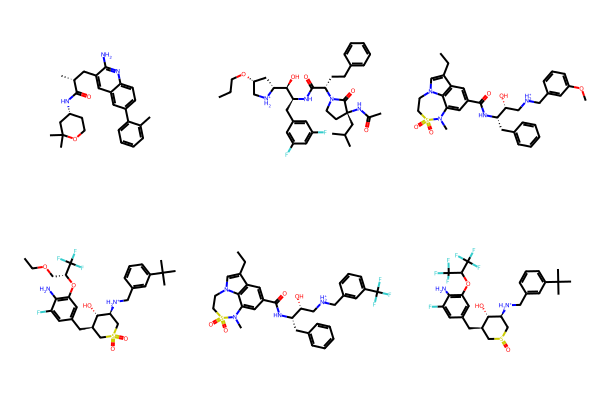

In [191]:
supplier = [Chem.MolFromSmiles(smi) for smi in df.mol]

peek = 6
Draw.MolsToGridImage([supplier[x] for x in range(peek)])

In [192]:
network = sg.HierS.from_dataframe(
    df, smiles_column='mol', name_column='CID',
    data_columns=['pIC50'], progress=True,
)

HierS:   0%|                                                                                              | 0/…

In [193]:
# We can access the number of molecule nodes and scaffold nodes in the graph
n_scaffolds = network.num_scaffold_nodes
n_molecules = network.num_molecule_nodes

print('\nGenerated scaffold network from {} molecules with {} scaffolds\n'.format(n_molecules, n_scaffolds))


Generated scaffold network from 1508 molecules with 1959 scaffolds



In [194]:
#network.__dir__()

[(1, 99), (2, 457), (3, 680), (4, 531), (5, 172), (6, 17), (7, 3)]


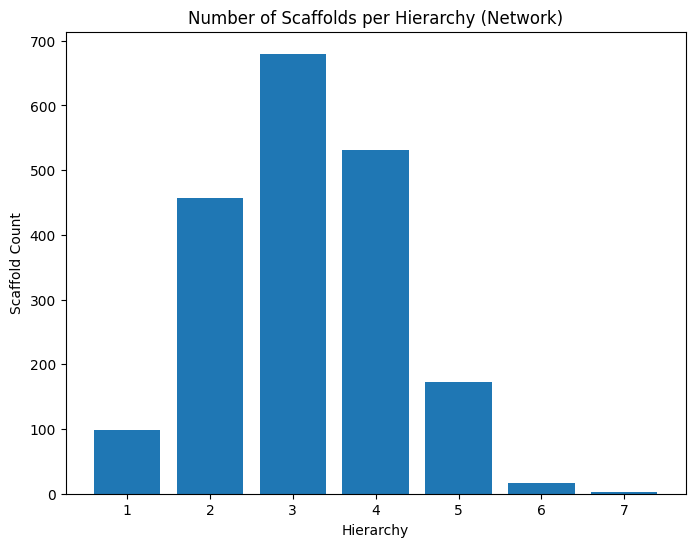

In [195]:
# We can get the number of scaffolds in each hierarchy easily

counts = network.get_hierarchy_sizes()  # returns a collections Counter object
lists = sorted(counts.items())
print(lists)
x, y = zip(*lists)

# Plot sizes as bar chart

plt.figure(figsize=(8, 6))
plt.bar(x, y)
plt.xlabel('Hierarchy')
plt.ylabel('Scaffold Count')
plt.title('Number of Scaffolds per Hierarchy (Network)')
plt.show()

In [197]:
tesdt =list(network.get_scaffold_nodes(data=True))

In [198]:
df = pd.DataFrame(list(network.get_scaffold_nodes(data=True)),columns=[['Smiles','data']])


In [225]:
list(network.get_molecule_nodes(data=True))


[('BACE_1',
  {'type': 'molecule',
   'smiles': 'Cc1ccccc1-c1ccc2nc(N)c(C[C@@H](C)C(=O)N[C@@H]3CCOC(C)(C)C3)cc2c1',
   'pIC50': 9.1549015}),
 ('BACE_2',
  {'type': 'molecule',
   'smiles': 'CCCO[C@H]1C[NH2+][C@@H]([C@@H](O)[C@H](Cc2cc(F)cc(F)c2)NC(=O)[C@H](CCc2ccccc2)N2CC[C@@](CC(C)C)(NC(C)=O)C2=O)C1',
   'pIC50': 8.8538723}),
 ('BACE_3',
  {'type': 'molecule',
   'smiles': 'CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C[NH2+]Cc4cccc(OC)c4)cc13)N(C)S(=O)(=O)CC2',
   'pIC50': 8.6989698}),
 ('BACE_4',
  {'type': 'molecule',
   'smiles': 'CCOC[C@@H](Oc1cc(C[C@@H]2CS(=O)(=O)C[C@H]([NH2+]Cc3cccc(C(C)(C)C)c3)[C@H]2O)cc(F)c1N)C(F)(F)F',
   'pIC50': 8.6989698}),
 ('BACE_5',
  {'type': 'molecule',
   'smiles': 'CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C[NH2+]Cc4cccc(C(F)(F)F)c4)cc13)N(C)S(=O)(=O)CC2',
   'pIC50': 8.6989698}),
 ('BACE_6',
  {'type': 'molecule',
   'smiles': 'CC(C)(C)c1cccc(C[NH2+][C@H]2CS(=O)C[C@@H](Cc3cc(F)c(N)c(OC(C(F)(F)F)C(F)(F)F)c3)[C@@H]2O)c1',
   'pIC50': 8.6989698}),

In [200]:
smilist = ['O=C(CCc1cnc2ccc(-c3ccccc3)cc2c1)NC1CCOCC1','c1ccc(-c2ccc3ncccc3c2)cc1','c1ccc2ncccc2c1','c1ccncc1']
mols = [Chem.MolFromSmiles(smi) for smi in smilist]

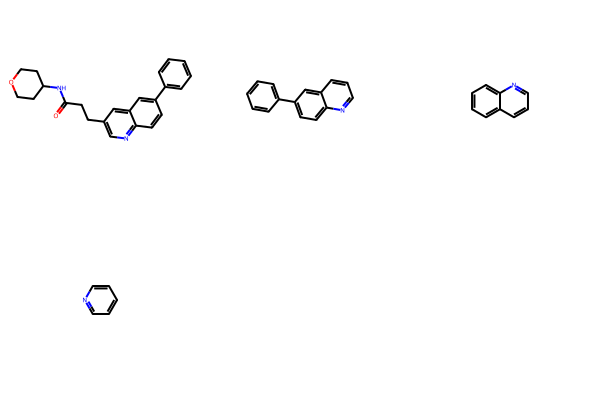

In [201]:
Draw.MolsToGridImage(mols)

In [202]:
re_dict = [rearrange(tup,smi) for smi, tup in tesdt ]


In [206]:
network_df = pd.DataFrame.from_dict(re_dict)
df


,Smiles,data
0,O=C(CCc1cnc2ccc(-c3ccccc3)cc2c1)NC1CCOCC1,"{'type': 'scaffold', 'hierarchy': 4}"
1,c1ccc(-c2ccc3ncccc3c2)cc1,"{'type': 'scaffold', 'hierarchy': 3}"
2,c1ccccc1,"{'type': 'scaffold', 'hierarchy': 1}"
3,c1ccc2ncccc2c1,"{'type': 'scaffold', 'hierarchy': 2}"
4,O=C(CCc1cnc2ccccc2c1)NC1CCOCC1,"{'type': 'scaffold', 'hierarchy': 3}"
...,...,...
1954,c1nnn[nH]1,"{'type': 'scaffold', 'hierarchy': 1}"
1955,c1ccc2c(c1)CCN=C2NCc1nnn[nH]1,"{'type': 'scaffold', 'hierarchy': 3}"
1956,O=C(CCCn1cnc2ccccc21)NCC[NH+]1CCOCC1,"{'type': 'scaffold', 'hierarchy': 3}"
1957,O=C(CCn1cnc2ccccc21)NCC1CCOCC1,"{'type': 'scaffold', 'hierarchy': 3}"


/usr/local/lib/python3.9/site-packages/rdkit/Chem/Draw/IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


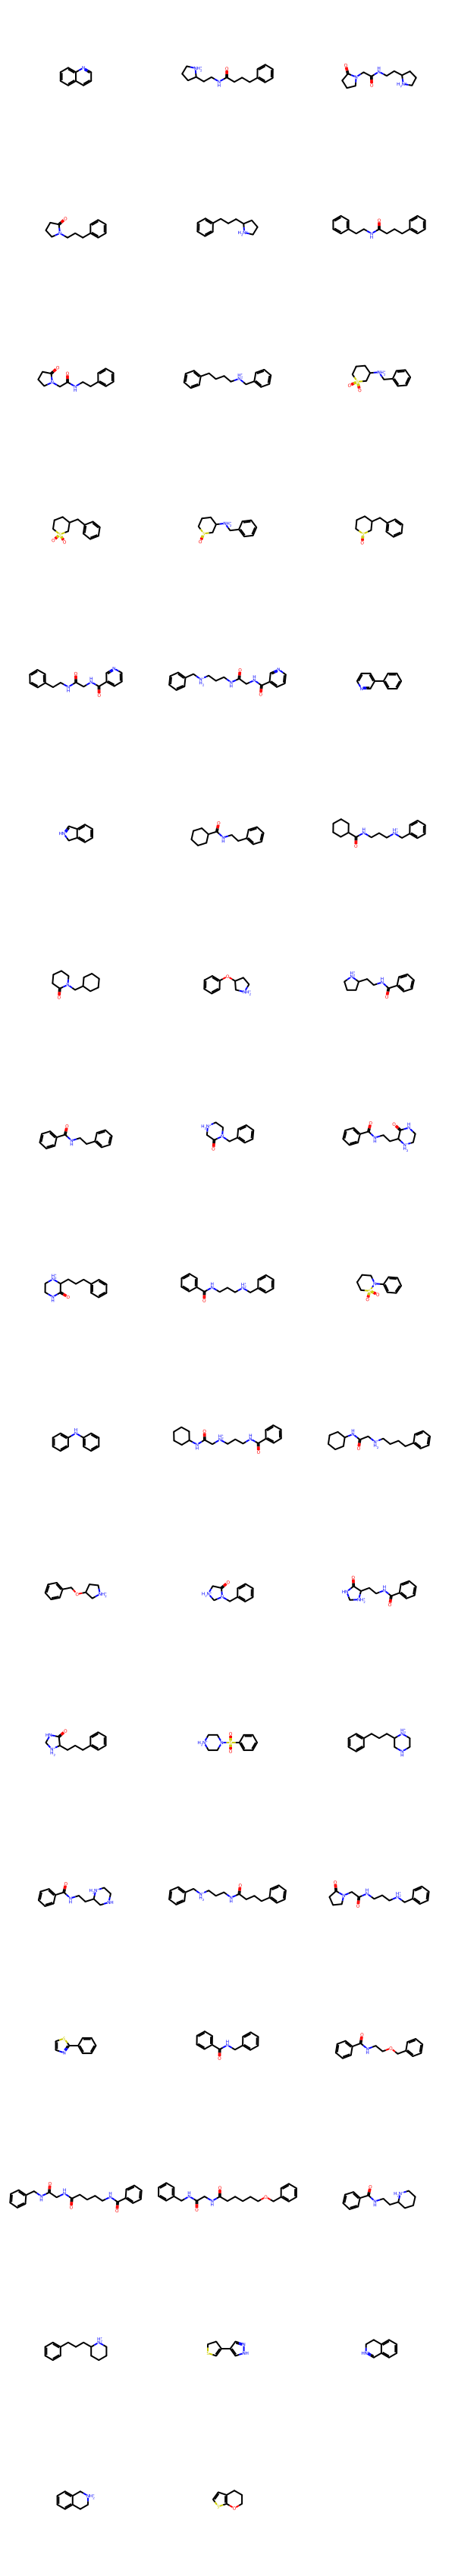

In [204]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in network_df[network_df.hierarchy == 2].smiles])

In [219]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(network_df, smilesCol='smiles')


,smiles,type,hierarchy,ROMol
0,O=C(CCc1cnc2ccc(-c3ccccc3)cc2c1)NC1CCOCC1,scaffold,4,
1,c1ccc(-c2ccc3ncccc3c2)cc1,scaffold,3,
2,c1ccccc1,scaffold,1,
3,c1ccc2ncccc2c1,scaffold,2,
4,O=C(CCc1cnc2ccccc2c1)NC1CCOCC1,scaffold,3,
...,...,...,...,...
1954,c1nnn[nH]1,scaffold,1,
1955,c1ccc2c(c1)CCN=C2NCc1nnn[nH]1,scaffold,3,
1956,O=C(CCCn1cnc2ccccc21)NCC[NH+]1CCOCC1,scaffold,3,
1957,O=C(CCn1cnc2ccccc21)NCC1CCOCC1,scaffold,3,

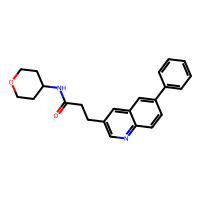
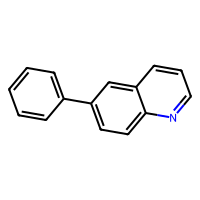
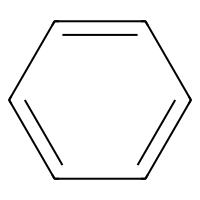
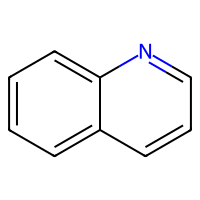
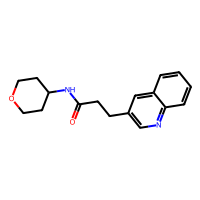
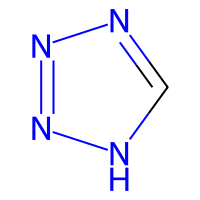
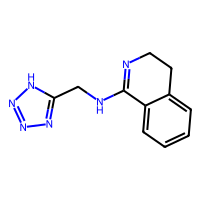
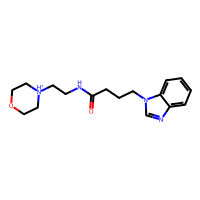
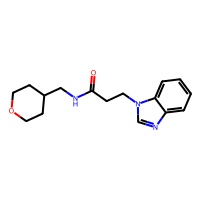
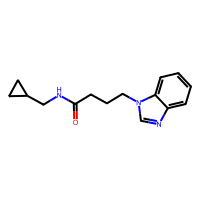

In [221]:
network_df

In [229]:
df = pd.read_csv('deepchem-bace.csv')
tree = sg.ScaffoldTree.from_dataframe(
    df, smiles_column='mol', name_column='CID',
    data_columns=['pIC50'], progress=True,
)

ScaffoldTree:   0%|                                                                                       | 0/…

PubChem ID: BACE_1


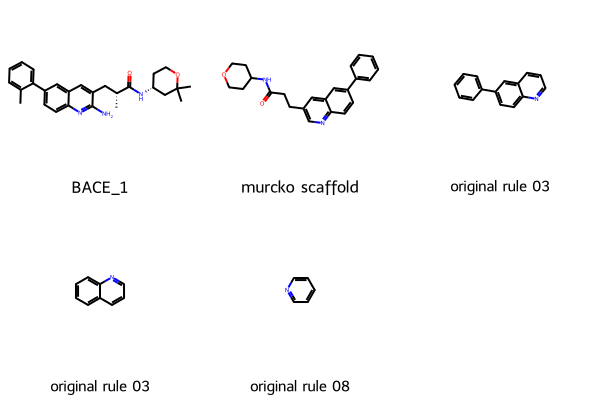

In [397]:
import random
random_pubchem_id = random.choice(list(tree.get_molecule_nodes()))
random_pubchem_id = 'BACE_1'
print('PubChem ID:', random_pubchem_id)
predecessors = nx.bfs_tree(tree, random_pubchem_id, reverse=True)

rules = [random_pubchem_id]
for edge in predecessors.edges():
    # we need to get the edge attr from the original tree
    data = tree.edges[edge[::-1]]
    if data['type'] == 0:  # molecule -> scaffold
        rules.append('murcko scaffold')
    else:  # scaffold -> scaffold
        rules.append(data['rule'])

# # Draw molecules
predecessors_list = list(predecessors)
predecessors_list[0] = tree.nodes[predecessors_list[0]]['smiles'] # [0] is pubchem ID
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in predecessors_list], legends=rules)

In [479]:
# looping over each element e.g ID/Name 
BACE_id = list(tree.get_molecule_nodes())
dff= pd.DataFrame()

for ids in BACE_id[0:3]:
    predecessors = nx.bfs_tree(tree, ids, reverse=True)
    rules = [ids]
    for edge in predecessors.edges():
    # we need to get the edge attr from the original tree
        data = tree.edges[edge[::-1]]
        if data['type'] == 0:  # molecule -> scaffold
            rules.append('murcko scaffold')
        else:  # scaffold -> scaffold
            rules.append(data['rule'])
        rules[0]='ID' # replacing molecule ID with column head ID
    rules.append('original') # adding element to the list to include the original molecule
    predecessors = list(predecessors)
    predecessors.append(tree.nodes[list(predecessors)[0]]['smiles']) # getting the smiles for original
    #print(rules)
    #_ = pd.DataFrame(predecessors).T # list to row
    #_.columns = rules # setting the columns
    


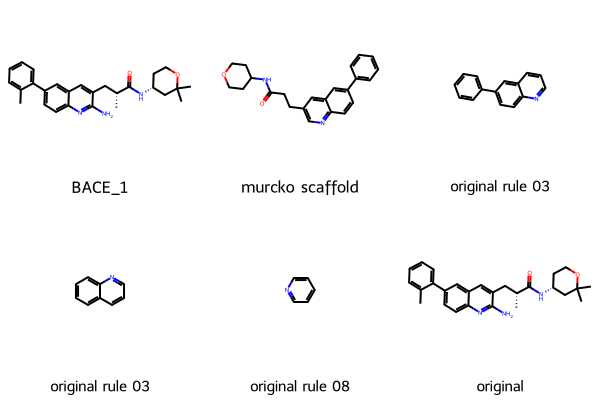

In [406]:
# # # Draw molecules
predecessors_list = list(predecessors)
predecessors_list[0] = tree.nodes[predecessors_list[0]]['smiles'] # [0] is pubchem ID, get smiles for original
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in predecessors_list], legends=rules)

In [459]:
BACE_id[0]

'BACE_1'

In [448]:
predecessors_list

['Cc1ccccc1-c1ccc2nc(N)c(C[C@@H](C)C(=O)N[C@@H]3CCOC(C)(C)C3)cc2c1',
 'O=C(CCc1cnc2ccc(-c3ccccc3)cc2c1)NC1CCOCC1',
 'c1ccc(-c2ccc3ncccc3c2)cc1',
 'c1ccc2ncccc2c1',
 'c1ccncc1',
 'Cc1ccccc1-c1ccc2nc(N)c(C[C@@H](C)C(=O)N[C@@H]3CCOC(C)(C)C3)cc2c1']